# Crop Recommendation

### Imports

In [33]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### Read in Data

In [2]:
data_path ='./Crop_recommendation.csv'
df = pd.read_csv(data_path)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### Basic Data info

In [9]:
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")
print(f"Number of Crops: {len(df['label'].unique())}")
print(f"The Names of the different crops are as follows:")
print(*df['label'].unique(), sep=', ')

Rows: 2200
Columns: 8
Number of Crops: 22
The Names of the different crops are as follows:
rice, maize, chickpea, kidneybeans, pigeonpeas, mothbeans, mungbean, blackgram, lentil, pomegranate, banana, mango, grapes, watermelon, muskmelon, apple, orange, papaya, coconut, cotton, jute, coffee


In [11]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

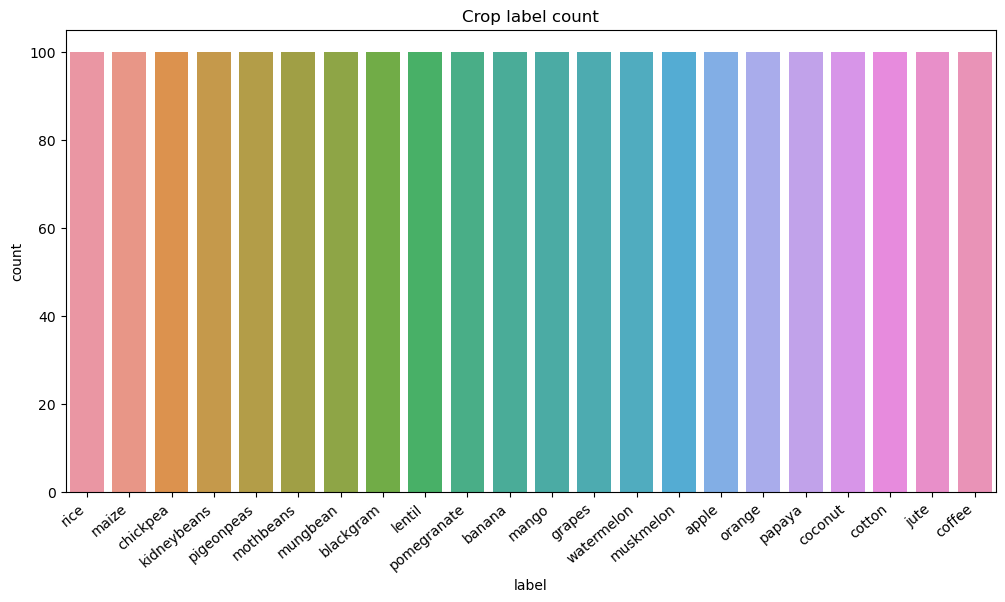

In [22]:
fig = plt.figure(figsize=(12,6))
ax =sns.countplot(x='label', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40, ha='right')
ax.set_title("Crop label count")
plt.show()

### Corrolation heat plot

Text(0.5, 1.0, 'Feature Corrolation heatmap')

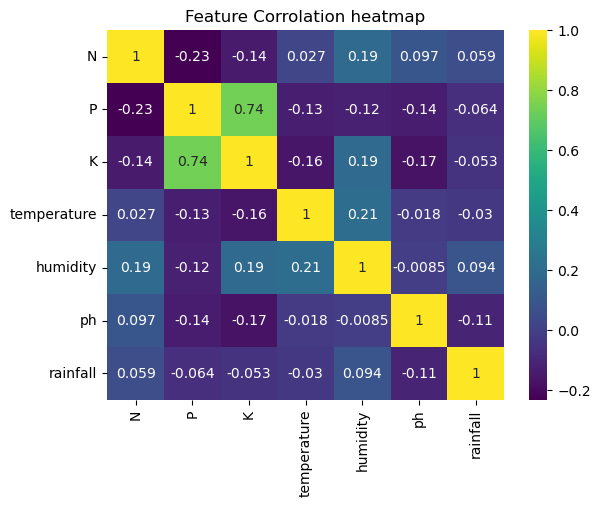

In [30]:
ax =sns.heatmap(df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']].corr(),annot=True,cmap='viridis')
ax.set_title("Feature Corrolation heatmap")

### Prepare Data for ML

In [38]:
features = ['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']
label = ['label']

acc = []
model =[]

X_train, X_test, y_train, y_test = train_test_split(df[features],df[label], test_size=0.2, shuffle=True,random_state=42)


## Naive bayes

## Decision Tree

In [40]:
decisionTree = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5)
decisionTree.fit(X_train,y_train)
predicted_values = decisionTree.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  86.5909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.61      1.00      0.75        20
    chickpea       1.00      0.96      0.98        26
     coconut       0.96      0.96      0.96        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.63      0.96      0.76        23
 kidneybeans       0.00      0.00      0.00        20
      lentil       0.42      1.00      0.59        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.00      0.00      0.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00 

In [41]:
NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,y_train)

predicted_values = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00 

## Random Forest

In [42]:
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

RF's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00

## KNN

In [45]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)

predicted_values = KNN.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('KNN')
print("KNN's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

RF's Accuracy is:  0.9704545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.76      0.96      0.85        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00

## MLP

In [48]:
MLP = MLPClassifier(alpha=1, max_iter=1000, random_state=42)
MLP.fit(X_train,y_train)

predicted_values = MLP.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('MLP')
print("MLP's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

MLP's Accuracy is:  0.9590909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.89      0.85      0.87        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.81      1.00      0.89        17
      grapes       1.00      1.00      1.00        14
        jute       0.84      0.91      0.87        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.83      0.91      0.87        11
       maize       1.00      0.76      0.86        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.88      0.96      0.92        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.0